In [39]:
import numpy as np
import tensorflow as tf

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="lite-model_deeplabv3_1_metadata_2.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
input_details

[{'name': 'sub_7',
  'index': 183,
  'shape': array([  1, 257, 257,   3], dtype=int32),
  'shape_signature': array([  1, 257, 257,   3], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [40]:
output_details = interpreter.get_output_details()
output_details

[{'name': 'ResizeBilinear_3',
  'index': 168,
  'shape': array([  1, 257, 257,  21], dtype=int32),
  'shape_signature': array([  1, 257, 257,  21], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [41]:
from PIL import Image

im = Image.open("/content/dwayne-the-rock--480x320.jpg")

(480, 320)


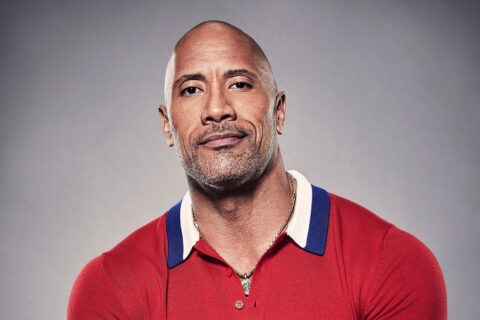

In [42]:
print(im.size)
im

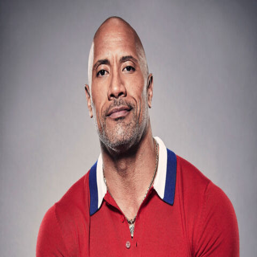

In [43]:
res_im = im.resize((257, 257))
res_im

In [44]:
np_res_im = np.array(res_im)
np_res_im = (np_res_im/255).astype('float32')
np_res_im

array([[[0.24313726, 0.2509804 , 0.28627452],
        [0.25490198, 0.25490198, 0.29411766],
        [0.2627451 , 0.2627451 , 0.3019608 ],
        ...,
        [0.28627452, 0.2784314 , 0.32941177],
        [0.2784314 , 0.27058825, 0.32156864],
        [0.27450982, 0.26666668, 0.31764707]],

       [[0.24705882, 0.25490198, 0.2901961 ],
        [0.25882354, 0.25882354, 0.29803923],
        [0.26666668, 0.26666668, 0.30588236],
        ...,
        [0.28627452, 0.28627452, 0.33333334],
        [0.2784314 , 0.2784314 , 0.3254902 ],
        [0.27450982, 0.27450982, 0.32156864]],

       [[0.2509804 , 0.2627451 , 0.29803923],
        [0.26666668, 0.26666668, 0.30588236],
        [0.27450982, 0.27450982, 0.3137255 ],
        ...,
        [0.29411766, 0.29411766, 0.34117648],
        [0.28627452, 0.28627452, 0.33333334],
        [0.28235295, 0.28235295, 0.32941177]],

       ...,

       [[0.5921569 , 0.57254905, 0.6       ],
        [0.6       , 0.5803922 , 0.60784316],
        [0.60784316, 0

In [45]:
input_details[0]['shape']

array([  1, 257, 257,   3], dtype=int32)

In [46]:
np_res_im.shape

(257, 257, 3)

In [47]:
if len(np_res_im.shape) == 3:
    np_res_im = np.expand_dims(np_res_im, 0)
# Test the model on random input data.
input_shape = input_details[0]['shape']
input_data = np_res_im
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
output_data

array([[[[17.824808 ,  2.703613 ,  2.1549768, ...,  4.483941 ,
           1.6932054,  6.9779673],
         [18.107344 ,  2.6816196,  2.0693903, ...,  4.500448 ,
           1.8114327,  7.2272663],
         [18.389881 ,  2.659626 ,  1.9838039, ...,  4.5169554,
           1.9296601,  7.4765654],
         ...,
         [17.804813 ,  2.7708337,  2.1915987, ...,  3.8221633,
           2.4259605,  6.986546 ],
         [17.644508 ,  2.8321006,  2.2347963, ...,  3.8048491,
           2.4392798,  6.8797874],
         [17.484203 ,  2.8933675,  2.277994 , ...,  3.787535 ,
           2.452599 ,  6.773029 ]],

        [[17.900581 ,  2.7036185,  2.1278164, ...,  4.55264  ,
           1.7510091,  6.9999304],
         [18.1653   ,  2.6881409,  2.0437098, ...,  4.569453 ,
           1.8588604,  7.2384615],
         [18.430021 ,  2.6726627,  1.9596032, ...,  4.5862656,
           1.9667116,  7.476992 ],
         ...,
         [17.845781 ,  2.8665679,  2.2129538, ...,  3.8122723,
           2.4666493,  7.

In [48]:
output_data.shape

(1, 257, 257, 21)

In [49]:
output_data[0].shape

(257, 257, 21)

In [50]:
labelsArrays = ["background", "aeroplane", "bicycle", "bird", "boat", "bottle", "bus",
      "car", "cat", "chair", "cow", "dining table", "dog", "horse", "motorbike",
      "person", "potted plant", "sheep", "sofa", "train", "tv"]

In [51]:
mSegmentBits = np.zeros((257,257)).astype(int)
outputbitmap = np.zeros((257,257)).astype(int)
for y in range(257):
    for x in range(257):
        maxval = 0
        mSegmentBits[x][y]=0
        
        for c in range(21):
            value = output_data[0][y][x][c]
            if c == 0 or value > maxVal:
                maxVal = value
                mSegmentBits[y][x] = c
#         print(mSegmentBits[x][y])
        label = labelsArrays[mSegmentBits[x][y]]
#         print(label)
        if(mSegmentBits[y][x]==15):
            outputbitmap[y][x]=1
        else:
            outputbitmap[y][x]=0

In [52]:
outputbitmap

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

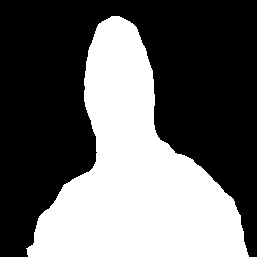

In [53]:
from PIL import Image
temp_outputbitmap= outputbitmap*255
PIL_image = Image.fromarray(np.uint8(temp_outputbitmap)).convert('L')
PIL_image

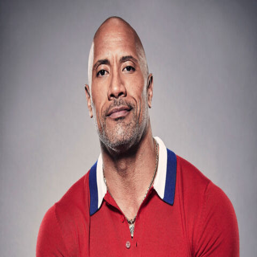

In [54]:
res_im

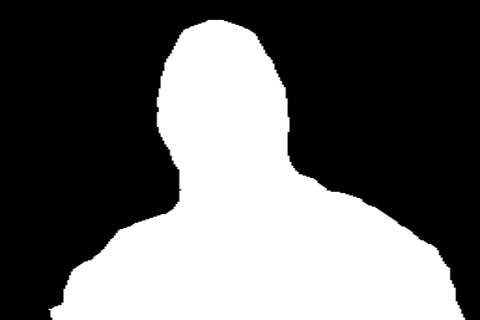

In [56]:
org_mask_img = PIL_image.resize(im.size)
org_mask_img